In [18]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm
import pydicom as pyd

In [19]:
copd = pd.read_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_7368subjects.csv")
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,GOLD-U_Unclassified,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,GOLD-U_Unclassified,CT,d1977763,African American,female


In [20]:
controls = copd.loc[copd['GOLD classification'] == 'GOLD_0_Control']
controls

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
9,chest,control,1,HMB,Yes,COPDGene_A02050_COPDGene_A02050,phs000179,GOLD_0_Control,CT,d1976718,African American,female
10,chest,control,1,HMB,Yes,COPDGene_A02098,phs000179,GOLD_0_Control,CT,d1990706,African,female
...,...,...,...,...,...,...,...,...,...,...,...,...
7358,chest,control,1,HMB,Yes,COPDGene_Q77225_COPDGene_Q77225,phs000179,GOLD_0_Control,CT,d1981234,Caucasian,male
7359,chest,control,1,HMB,Yes,COPDGene_Q77279_COPDGene_Q77279,phs000179,GOLD_0_Control,CT,d1982385,Caucasian,female
7360,chest,control,1,HMB,Yes,COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1992315,Caucasian,female
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female


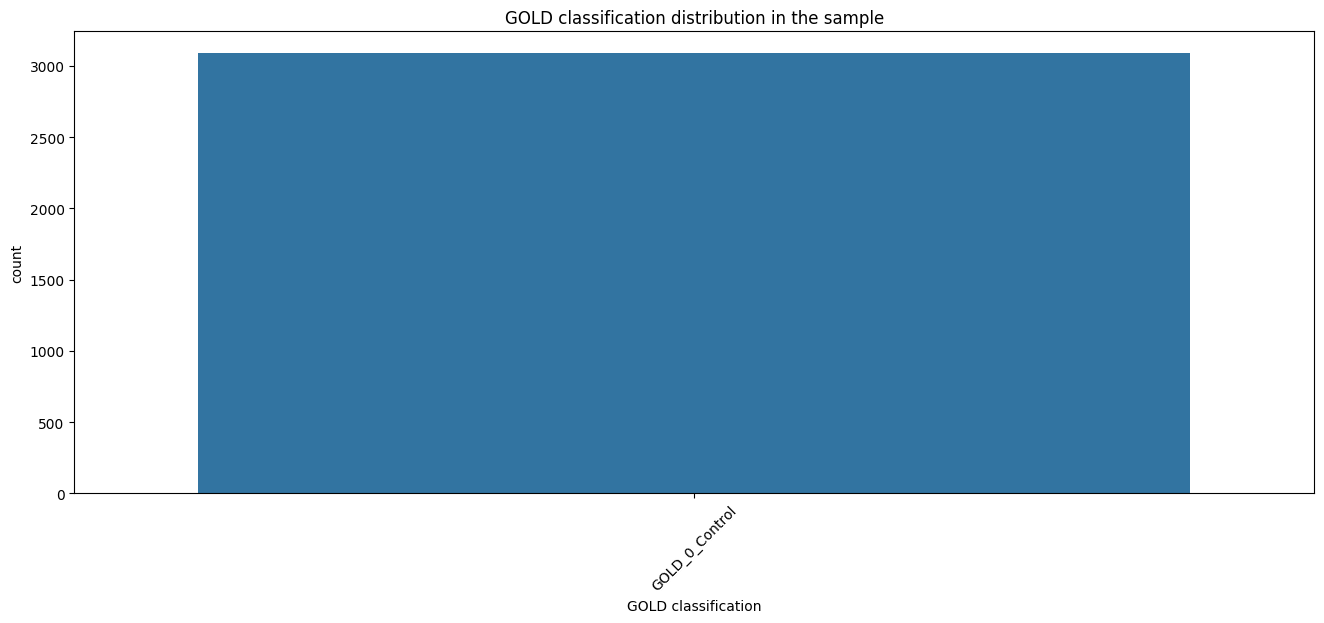

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=controls)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Random sample 50 controls
controls = controls.sample(n=200)
controls
controls.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/randomsample_allkernels_controls.csv", index=False)

In [23]:
def curate_copd_data_SPIE():
    copd = pd.read_csv('/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/randomsample_allkernels_controls.csv')
    file_names = copd['File Name'].to_list()
    source = '/fs5/p_masi/krishar1/COPDGENE/SPIE_2025'

    #Append all files to a list 
    dcmfilesfinal = []

    for file in tqdm(file_names):
        if file in os.listdir(source):
            dirpath = os.path.join(source, file)
            subdirs = os.listdir(dirpath)
            if len(subdirs) == 1:
                sub_sudir = subdirs[0]
                if sub_sudir == "19000101":
                    sub_sudir_path = os.path.join(dirpath, sub_sudir)
                    files = os.listdir(sub_sudir_path)
                    for subfile in files:
                        dmcfilepath = os.path.join(sub_sudir_path, subfile)
                        dcmfilesfinal.append(dmcfilepath)
                else:
                    sub_sudir_path = os.path.join(dirpath, sub_sudir)
                    dcmfilesfinal.append(sub_sudir_path)
            else:
                for subdir in subdirs:
                    sub_sudir_path = os.path.join(dirpath, subdir)
                    dcmfilesfinal.append(sub_sudir_path)

    # print(dcmfilesfinal)
                

    #Append all the files as a column in a new dataframe 
    copd_files = {'File_Path': dcmfilesfinal}
    df = pd.DataFrame(copd_files)

    df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_SPIE_data_debug.csv", index=False)

    #Loop through all the files and extract the following meta data: Reconstruction kernel, series description, manufacturer
    for index, row in tqdm(df.iterrows()):
        dcm = pyd.dcmread(os.path.join(row['File_Path'],os.listdir(row['File_Path'])[0])) #Read the first dicom file
    
        # Check if specific DICOM tags are present
        tags = ['PatientID','ConvolutionKernel', 'SeriesDescription', 'Manufacturer']
        for tag in tags:
            if tag in dir(dcm):
                df.at[index, tag] = getattr(dcm, tag)
            else:
                df.at[index, tag] = pd.NA

    print(df)
    df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_SPIE_data.csv", index=False)

curate_copd_data_SPIE()

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:03<00:00, 58.74it/s]
829it [01:39,  7.88it/s]

                                             File_Path        PatientID  \
0    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_P64017   
1    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_P64017   
2    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_P64017   
3    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_P64017   
4    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_P64017   
..                                                 ...              ...   
824  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_G26252   
825  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_K19717   
826  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_K19717   
827  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_K19717   
828  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_K19717   

    ConvolutionKernel        SeriesDescription        Manufacturer  
0                B35f      COP

In [24]:
#Read dataframe 
df = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_SPIE_data.csv")
df.value_counts('ConvolutionKernel')

ConvolutionKernel
B31f        206
BONE        152
STANDARD    152
B46f        107
B45f        102
B35f         80
B            14
D            14
B50f          2
dtype: int64

In [25]:
#Only keep the BONE and STANDARD kernels
df = df.loc[df['ConvolutionKernel'].isin(['BONE', 'STANDARD'])]
df

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_INSP_SHARP,GE MEDICAL SYSTEMS
7,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_INSP_STD,GE MEDICAL SYSTEMS
8,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_EXP_STD,GE MEDICAL SYSTEMS
9,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_EXP_SHARP,GE MEDICAL SYSTEMS
18,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,STANDARD,COPDGene_E73754_EXP_STD,GE MEDICAL SYSTEMS
...,...,...,...,...,...
806,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,BONE,COPDGene_N71475_INSP_SHARP,GE MEDICAL SYSTEMS
821,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,STANDARD,COPDGene_G26252_INSP_STD,GE MEDICAL SYSTEMS
822,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_INSP_SHARP,GE MEDICAL SYSTEMS
823,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_EXP_SHARP,GE MEDICAL SYSTEMS


In [26]:
import re 
df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_GEkernelsonly.csv", index=False)

In [27]:
def get_inspiratory_expiratory_GEkernels():
    copd_bone_standard = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_GEkernelsonly.csv")
    for index, row in tqdm(copd_bone_standard.iterrows()):
        print(row['File_Path'])
        count = row['File_Path'].count('/')
        head, tail = row['File_Path'].rsplit('/', 1)
        #Check if the expression "INSP_SHARP" is in the file path
        match = re.search('(INSP_SHARP|EXP_SHARP|INSP_STD|EXP_STD|EXP-SHARP|INSP-SHARP|INSP-STD|EXP-STD)', tail)
        if match:
            copd_bone_standard.at[index, 'Inspiration_Expiration'] = match.group()
        else:
            copd_bone_standard.at[index, 'Inspiration_Expiration'] = pd.NA

    copd_bone_standard.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_contorls_GEkernels_matched.csv", index=False)

get_inspiratory_expiratory_GEkernels()

304it [00:00, 7025.21it/s]

/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_J39758_COPDGene_J39758/19000101/Series_002-141128-COPDGene_J39758_INSP_SHARP
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_J39758_COPDGene_J39758/19000101/Series_003-141128-COPDGene_J39758_INSP_STD
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_J39758_COPDGene_J39758/19000101/Series_005-141251-COPDGene_J39758_EXP_STD
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_J39758_COPDGene_J39758/19000101/Series_004-141251-COPDGene_J39758_EXP_SHARP
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_E73754_COPDGene_E73754/19000101/Series_006-120718-COPDGene_E73754_EXP_STD
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_E73754_COPDGene_E73754/19000101/Series_005-120718-COPDGene_E73754_EXP_SHARP
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_E73754_COPDGene_E73754/19000101/Series_003-120607-COPDGene_E73754_INSP_SHARP
/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGene_E73754_COPDGene_E73754/19000101/Series_004-120607-COPDGene_E73754_INSP_STD
/fs5

In [28]:
copd_bone_standard = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_contorls_GEkernels_matched.csv")
copd_bone_standard = copd_bone_standard[copd_bone_standard['Inspiration_Expiration'].isin(['INSP_SHARP', 'EXP_STD'])]
copd_bone_standard

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,STANDARD,COPDGene_E73754_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,BONE,COPDGene_E73754_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
13,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_B72303,STANDARD,COPDGene_B72303_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
...,...,...,...,...,...,...
295,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_F79779,STANDARD,COPDGene_F79779_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
296,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,STANDARD,COPDGene_N71475_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
299,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,BONE,COPDGene_N71475_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
301,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [29]:
grouped = copd_bone_standard.groupby('PatientID')
grouped
filtered = grouped.filter(lambda x: all(scan in x['Inspiration_Expiration'].values for scan in ['INSP_SHARP', 'EXP_STD']))
filtered

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,STANDARD,COPDGene_E73754_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,BONE,COPDGene_E73754_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
13,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_B72303,STANDARD,COPDGene_B72303_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
...,...,...,...,...,...,...
295,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_F79779,STANDARD,COPDGene_F79779_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
296,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,STANDARD,COPDGene_N71475_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
299,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,BONE,COPDGene_N71475_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
301,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [30]:
filtered.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_control_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv", index=False)

In [31]:
copd_insp_exp = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_control_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv")
copd_insp_exp

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,STANDARD,COPDGene_E73754_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,BONE,COPDGene_E73754_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_B72303,STANDARD,COPDGene_B72303_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
...,...,...,...,...,...,...
107,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_F79779,STANDARD,COPDGene_F79779_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
108,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,STANDARD,COPDGene_N71475_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
109,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,BONE,COPDGene_N71475_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
110,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [32]:
copd_insp_exp['PatientID_Inspiration_Expiration'] = copd_insp_exp['PatientID'] + '_' + copd_insp_exp['ConvolutionKernel']
copd_insp_exp

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,BONE,COPDGene_J39758_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_J39758_BONE
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J39758,STANDARD,COPDGene_J39758_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_J39758_STANDARD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,STANDARD,COPDGene_E73754_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_E73754_STANDARD
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_E73754,BONE,COPDGene_E73754_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_E73754_BONE
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_B72303,STANDARD,COPDGene_B72303_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_B72303_STANDARD
...,...,...,...,...,...,...,...
107,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_F79779,STANDARD,COPDGene_F79779_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_F79779_STANDARD
108,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,STANDARD,COPDGene_N71475_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_N71475_STANDARD
109,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_N71475,BONE,COPDGene_N71475_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_N71475_BONE
110,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_G26252,BONE,COPDGene_G26252_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_G26252_BONE


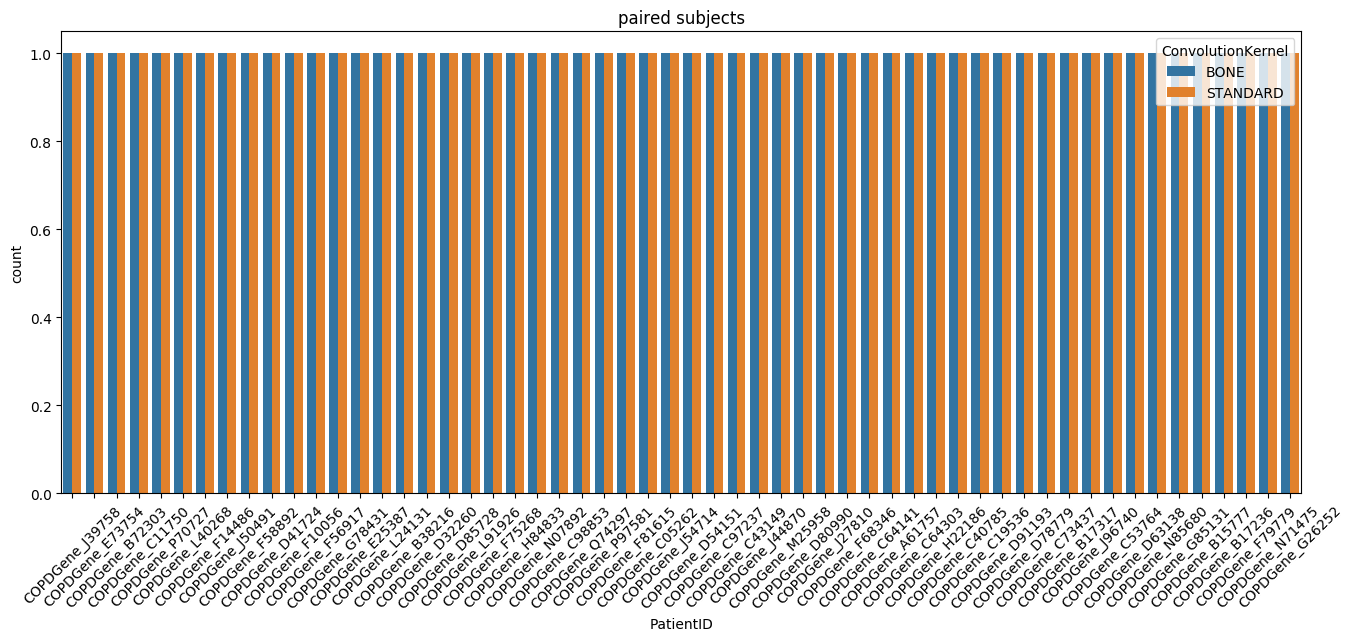

In [34]:
plt.figure(figsize=(16,6))
sns.countplot(x='PatientID', data=copd_insp_exp, hue='ConvolutionKernel')
plt.title('paired subjects')
plt.xticks(rotation=45)
plt.show()

In [35]:
os.makedirs("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data_controls", exist_ok=True)

for index, row in copd_insp_exp.iterrows():
    patient_id_inspiration_expiration = row['PatientID_Inspiration_Expiration']
    src = row['File_Path']
    dest = f"/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data_controls/{patient_id_inspiration_expiration}"
    
    os.symlink(src, dest)